# Del 08: Strojno učenje: Klasifikacija    

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Uvod v klasifikacijo


### What Is Classification?

### When Do You Need Classification?

**Types of Classification Algorithms:**
- Linear Models
    - Logistic Regression
    - Support Vector Machines
- Nonlinear models
    - K-nearest Neighbors (KNN)
    - Kernel Support Vector Machines (SVM)
    - Naïve Bayes
    - Decision Tree Classification
    - Random Forest Classification

## Naive Bayes Classification

### Bayesian Classification

### Gaussian Naive Bayes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

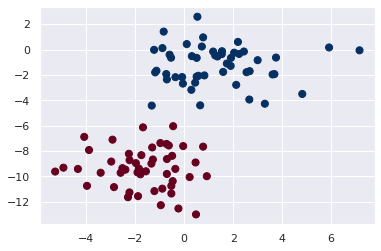

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

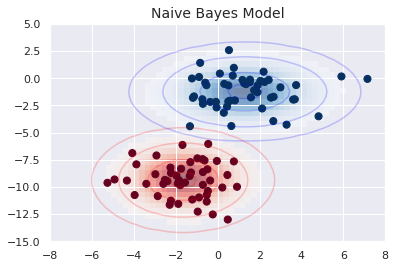

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
model = GaussianNB()
model.fit(X, y);

In [6]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

ynew = model.predict(Xnew)

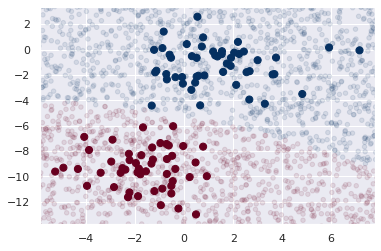

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [8]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Multinomial Naive Bayes

#### Text Features

In [9]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

####  Example: Classifying Text

In [10]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

NameError: name 'fetch_20newsgroups' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

In [ ]:
predict_category('discussing islam vs atheism')

In [ ]:
predict_category('determining the screen resolution')

In [ ]:
predict_category('computer cpu usage')

### When to Use Naive Bayes

## Support Vector Machines

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### Motivating Support Vector Machines

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
plt.show()

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);
plt.show()

### Support Vector Machines: Maximizing the Margin

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Fitting a support vector machine

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 100, 150, 200], ax=fixed(None));

### Beyond linear boundaries: Kernel SVM

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, -45, 0, 20, 45, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Tuning the SVM: Softening Margins

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### Example: Face Recognition

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## KNN Classification

### How does the KNN algorithm work?

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png">

### Eager Vs. Lazy Learners

### Curse of Dimensionality

### How do you decide the number of neighbors in KNN?

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png">

In [ ]:
-> majen k => nizek bias in visoka varianca (overfitting)
-> velik k => višji bias in nizka varianca (underfittng)

In [11]:
! pip install mlxtend

     |████████████████████████████████| 1.3 MB 3.8 MB/s eta 0:00:01


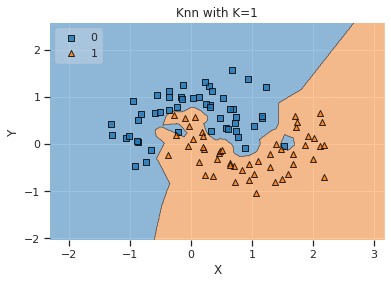

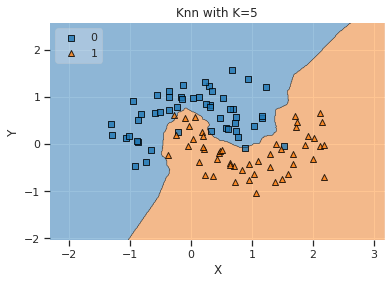

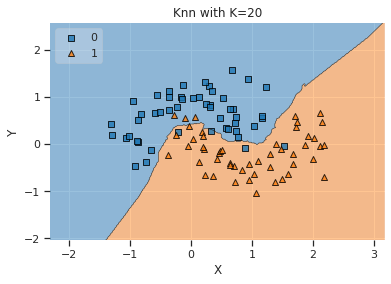

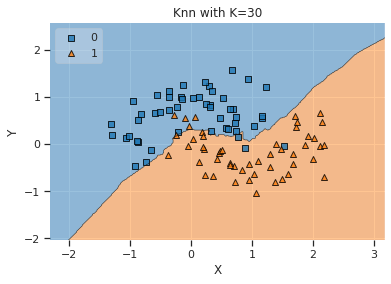

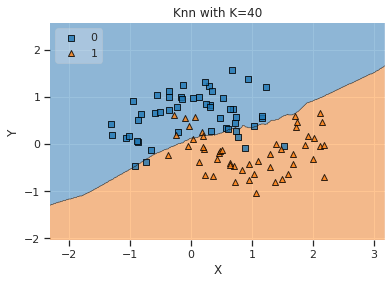

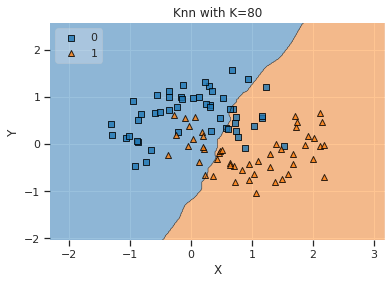

In [12]:
from class_algs import knn_comparison

data1 = pd.read_csv('data/ushape.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data1, i)

In [ ]:
Nujno je potrebno podatke skalirati (normalizirati)

### Primer: Iris dataset

In [13]:
# Naložimo dataset
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [14]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [15]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [16]:
iris.data.shape

(150, 4)

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


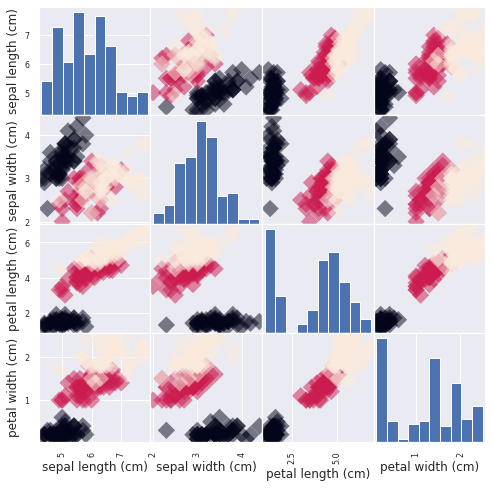

In [19]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize = [8, 8], s=150, marker = 'D')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Create arrays for the features and the response variable
y = iris.target
X = df.values

In [21]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [23]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [24]:
# Fit the classifier to the data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
# Print the accuracy
print(knn.score(X_test_scaled, y_test))

0.9473684210526315


In [26]:
# Predict the labels for the training data X
predict = knn.predict(X_test_scaled)

In [27]:
predict

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1])

In [28]:
from sklearn.metrics import accuracy_score
# evaluate accuracy
print(accuracy_score(y_test, predict))

0.9473684210526315


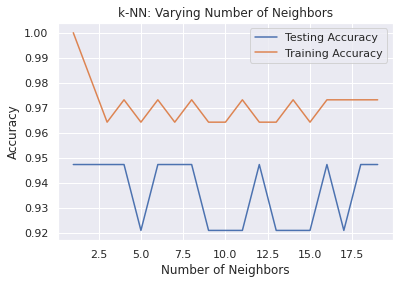

In [30]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_scaled, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

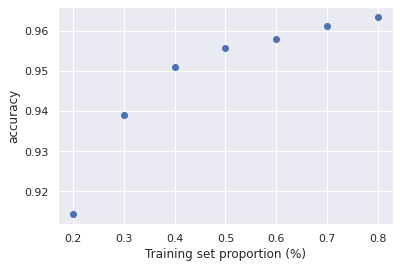

In [33]:
train_proportion = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 6)

plt.figure()

for s in train_proportion:
    scores = []
    for i in range(1,1000):
        Xn_train, Xn_test, yn_train, yn_test = train_test_split(X, y, test_size = 1-s)
        
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(Xn_train)
        X_test_scaled = scaler.transform(Xn_test)
        
        knn.fit(X_train_scaled, yn_train)
        scores.append(knn.score(X_test_scaled, yn_test))   
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')
plt.show()

## Primerjava klasifikacijskih modelov

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
from class_algs import plot_classifier, plot_contours, make_meshgrid, X, y

In [36]:
def plot_4_classifiers(X, y, clfs):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    for clf, ax, title in zip(clfs, sub.flatten(), ("LogisticRegression", "SVC", "GaussianNB", "KNeighborsClassifier")):
        clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

In [37]:
# Define the classifiers
classifiers = [LogisticRegression(), SVC(kernel='rbf', C=1E6), GaussianNB(), KNeighborsClassifier()]

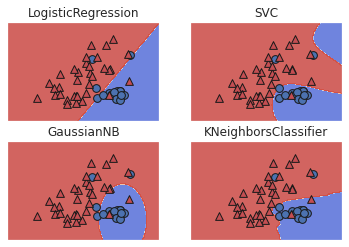

In [38]:
# Fit the classifiers
for c in classifiers:
    c.fit(X,y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

### Performance Evaluation Metrics

Performance evaluation metrics are based on the total number of the following variables:
- `True Positives`: outcome correctly predicted as positive class
- `True Negatives`: outcome correctly predicted as negative class
- `False Positives`: outcome incorrectly predicted as positive class
- `False Negatives`: outcome incorrectly predicted as negative class

<img alt="Image for post" class="yi yj dq hq dr hr v c" width="459" height="252" src="https://miro.medium.com/max/459/1*hn73Xm_aTkXLP6BDS4AOWw.png" srcset="https://miro.medium.com/max/276/1*hn73Xm_aTkXLP6BDS4AOWw.png 276w, https://miro.medium.com/max/459/1*hn73Xm_aTkXLP6BDS4AOWw.png 459w" sizes="459px">

- **Accuracy**: test’s ability to correctly predict both classes
- **Precision**: test’s ability to correctly detect positive classes from all predicted positive classes
- **Recall (Sensitivity)**: test’s ability to correctly detect positive classes from all actual positive classes
- **F1 Score**: harmonic mean of precision and recall

<img alt="Image for post" class="yi yj dq hq dr hr v c" width="821" height="325" src="https://miro.medium.com/max/821/1*Ga4hz2DY2dcWLR22YDN3Yw.png" srcset="https://miro.medium.com/max/276/1*Ga4hz2DY2dcWLR22YDN3Yw.png 276w, https://miro.medium.com/max/552/1*Ga4hz2DY2dcWLR22YDN3Yw.png 552w, https://miro.medium.com/max/640/1*Ga4hz2DY2dcWLR22YDN3Yw.png 640w, https://miro.medium.com/max/700/1*Ga4hz2DY2dcWLR22YDN3Yw.png 700w" sizes="700px">

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Set random seed
np.random.seed(42)

# Load csv file
df = pd.read_csv('data/framingham.csv')

# View top 5 rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [41]:
df.shape

(4240, 16)

###  Exploratory Data Analysis

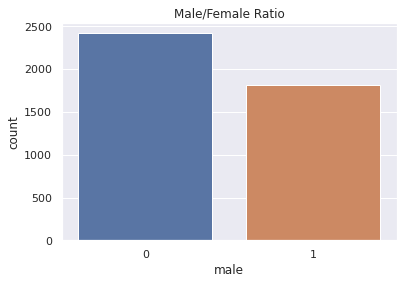

In [42]:
sns.countplot(x=df["male"]).set_title("Male/Female Ratio")
plt.show()

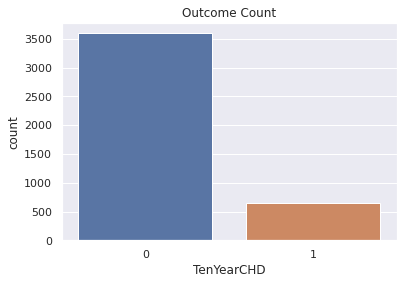

In [43]:
sns.countplot(x=df["TenYearCHD"]).set_title("Outcome Count")
plt.show()

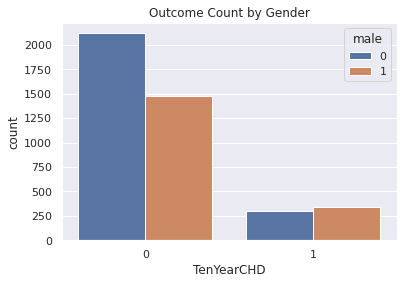

In [44]:
sns.countplot(x="TenYearCHD", hue="male", data=df).set_title('Outcome Count by Gender')
plt.show()

### Data Cleaning

In [45]:
df.isnull().values.any()

True

In [46]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [47]:
df = df.dropna()

In [48]:
df.isnull().values.any()

False

### Data Balancing

In [49]:
!pip install imbalanced-learn

     |████████████████████████████████| 167 kB 3.8 MB/s eta 0:00:01


In [50]:
X = df.drop(columns="TenYearCHD", axis=0)

In [51]:
y = df["TenYearCHD"]

In [52]:
from imblearn.under_sampling import RandomUnderSampler

In [53]:
rus = RandomUnderSampler(random_state=42)

In [54]:
df_data, df_target = rus.fit_resample(X, y)

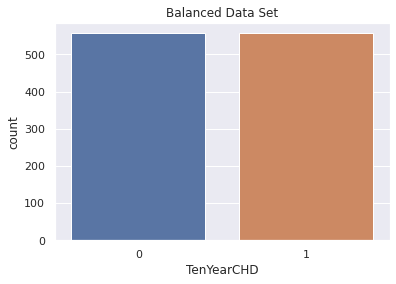

In [55]:
sns.countplot(x=df_target).set_title('Balanced Data Set')
plt.show()

In [56]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_data = mms.fit_transform(df_data)

In [57]:
df_data[:5]

array([[0.        , 0.34285714, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30672269,
        0.1820331 , 0.2962963 , 0.13197845, 0.32258065, 0.13559322],
       [1.        , 0.54285714, 0.        , 1.        , 0.66666667,
        0.        , 0.        , 0.        , 0.        , 0.22689076,
        0.24822695, 0.26455026, 0.15426053, 0.27956989, 0.09322034],
       [0.        , 0.08571429, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.17647059,
        0.16548463, 0.23280423, 0.22355534, 0.24731183, 0.12711864],
       [0.        , 0.31428571, 0.        , 1.        , 0.16666667,
        0.        , 0.        , 0.        , 0.        , 0.22268908,
        0.1536643 , 0.28571429, 0.13197845, 0.48387097, 0.10451977],
       [1.        , 0.34285714, 0.        , 1.        , 0.08333333,
        0.        , 0.        , 0.        , 0.        , 0.20378151,
        0.19621749, 0.42328042, 0.21669931, 

### Models Building and Performance Evaluation

In [58]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

In [59]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [61]:
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
knc_model = KNeighborsClassifier(n_neighbors=5)
gnb_model = GaussianNB()

In [62]:
def models_evaluation(X, y, folds):    
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    knc = cross_validate(knc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'K-Neighbors Classifier':[knc['test_accuracy'].mean(),
                                                       knc['test_precision'].mean(),
                                                       knc['test_recall'].mean(),
                                                       knc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    return(models_scores_table)

In [63]:
models_evaluation(df_data, df_target, 5)

,Logistic Regression,Support Vector Classifier,K-Neighbors Classifier,Gaussian Naive Bayes,Best Score
Accuracy,0.649913,0.657977,0.579885,0.597891,Support Vector Classifier
Precision,0.647492,0.655609,0.580204,0.717736,Gaussian Naive Bayes
Recall,0.662452,0.669659,0.579778,0.323214,Support Vector Classifier
F1 Score,0.654560,0.662216,0.579896,0.441818,Support Vector Classifier
